In [324]:
from pymatgen import Lattice, Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import pymatgen.symmetry.structure 
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.kpath import KPathBase
import numpy as np
import matplotlib.pyplot as plot
from pymatgen.symmetry.bandstructure import HighSymmKpath
from pymatgen import Spin

In [325]:
with MPRester("pyNX4Po9ZxSuwfvq") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-23210")
    bands = m.get_bandstructure_by_material_id("mp-23210", line_mode=True)
    w = CifWriter(structure,symprec = 0.1)
    w.write_file('Structure-MgCl2sym.cif')
    structuresym = Structure.from_file("Structure-MgCl2sym.cif")

1. BANDE INTERDITE

In [326]:
forbid = bands.get_band_gap()
print("La bande interdite à une énergie de",forbid['energy'], "eV")
print("Le gap est un gap indirect")
vbm = bands.get_vbm()
cbm = bands.get_cbm()
print("On peut verifier que cela correspond bien au min de la bande de conduction moins le max de la bande de valence = ",cbm['energy']-vbm['energy'])

La bande interdite à une énergie de 5.6168 eV
Le gap est un gap indirect
On peut verifier que cela correspond bien au min de la bande de conduction moins le max de la bande de valence =  5.6168


2.Trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.

Pour cela nous allons trouver les chemins où la différence d'énergie entre le point de départ et le point d'arrivée est la plus grande (ou la plus petite).

In [327]:
#on va chercher la derniere bande de valence et la premiere bande de conduction 
vbm = bands.get_vbm()
cbm = bands.get_cbm()

bandlist = list(bands.bands.values())[0]
val = bandlist[10]
cond = bandlist[11]





In [328]:
#pour la bande de valence, on affiche l'énergie pour certains points du réseau réciproque (en coordonées fractionelles)
e = 0
print("liste1 : énergies derniere bande de valence","\n")
for kpo in bands.kpoints:
    print(val[e],"kpoint = ",kpo.frac_coords)
    e = e+1

liste1 : énergies derniere bande de valence 

-0.8546 kpoint =  [0. 0. 0.]
-0.8497 kpoint =  [0.025 0.    0.   ]
-0.8384 kpoint =  [0.05 0.   0.  ]
-0.8269 kpoint =  [0.075 0.    0.   ]
-0.8198 kpoint =  [0.1 0.  0. ]
-0.8187 kpoint =  [0.125 0.    0.   ]
-0.8244 kpoint =  [0.15 0.   0.  ]
-0.8366 kpoint =  [0.175 0.    0.   ]
-0.8553 kpoint =  [0.2 0.  0. ]
-0.8802 kpoint =  [0.225 0.    0.   ]
-0.9112 kpoint =  [0.25 0.   0.  ]
-0.948 kpoint =  [0.275 0.    0.   ]
-0.9904 kpoint =  [0.3 0.  0. ]
-1.038 kpoint =  [0.325 0.    0.   ]
-1.0904 kpoint =  [0.35 0.   0.  ]
-1.1464 kpoint =  [0.375 0.    0.   ]
-1.2047 kpoint =  [0.4 0.  0. ]
-1.2272 kpoint =  [0.425 0.    0.   ]
-1.2385 kpoint =  [0.45 0.   0.  ]
-1.2453 kpoint =  [0.475 0.    0.   ]
-1.2476 kpoint =  [0.5 0.  0. ]
-1.2476 kpoint =  [0.5 0.  0. ]
-1.256 kpoint =  [ 0.5         0.01415668 -0.01415668]
-1.2794 kpoint =  [ 0.5         0.02831335 -0.02831335]
-1.3125 kpoint =  [ 0.5         0.04247003 -0.04247003]
-1.2898 kpoin

In [335]:
#pour la bande de conduction, on affiche l'énergie pour certains points du réseau réciproque (en coordonées fractionelles)
e = 0
print("liste2 : énergies premiere bande de conduction","\n")
for kpo in bands.kpoints:
    print(cond[e],"kpoint = ",kpo.frac_coords)
    e = e+1

liste2 : énergies premiere bande de conduction 

4.8049 kpoint =  [0. 0. 0.]
4.8298 kpoint =  [0.025 0.    0.   ]
4.9029 kpoint =  [0.05 0.   0.  ]
5.0195 kpoint =  [0.075 0.    0.   ]
5.173 kpoint =  [0.1 0.  0. ]
5.355 kpoint =  [0.125 0.    0.   ]
5.5565 kpoint =  [0.15 0.   0.  ]
5.7676 kpoint =  [0.175 0.    0.   ]
5.9773 kpoint =  [0.2 0.  0. ]
6.1718 kpoint =  [0.225 0.    0.   ]
6.3333 kpoint =  [0.25 0.   0.  ]
6.441 kpoint =  [0.275 0.    0.   ]
6.4822 kpoint =  [0.3 0.  0. ]
6.4669 kpoint =  [0.325 0.    0.   ]
6.4196 kpoint =  [0.35 0.   0.  ]
6.3612 kpoint =  [0.375 0.    0.   ]
6.304 kpoint =  [0.4 0.  0. ]
6.255 kpoint =  [0.425 0.    0.   ]
6.218 kpoint =  [0.45 0.   0.  ]
6.195 kpoint =  [0.475 0.    0.   ]
6.1873 kpoint =  [0.5 0.  0. ]
6.1873 kpoint =  [0.5 0.  0. ]
6.2103 kpoint =  [ 0.5         0.01415668 -0.01415668]
6.2773 kpoint =  [ 0.5         0.02831335 -0.02831335]
6.3815 kpoint =  [ 0.5         0.04247003 -0.04247003]
6.5119 kpoint =  [ 0.5         0.056626

In [330]:
#chemins qui sont utilisés pour analyser la structure de bande
path = HighSymmKpath(structure) 
print("Les coordonnées des points de départ et d'arrivée sont :")
print(path.kpath['kpoints'],"\n")
print("Les chemins suivis sont :",path.kpath['path'],"\n")
points = path.kpath['kpoints']

Les coordonnées des points de départ et d'arrivée sont :
{'\\Gamma': array([0., 0., 0.]), 'B': array([0.81596319, 0.5       , 0.18403681]), 'B_1': array([ 0.5       ,  0.18403681, -0.18403681]), 'F': array([0.5, 0.5, 0. ]), 'L': array([0.5, 0. , 0. ]), 'L_1': array([ 0. ,  0. , -0.5]), 'P': array([0.81596319, 0.3420184 , 0.3420184 ]), 'P_1': array([0.6579816 , 0.6579816 , 0.18403681]), 'P_2': array([ 0.3420184 ,  0.3420184 , -0.18403681]), 'Q': array([0.6579816, 0.3420184, 0.       ]), 'X': array([ 0.3420184,  0.       , -0.3420184]), 'Z': array([0.5, 0.5, 0.5])} 

Les chemins suivis sont : [['\\Gamma', 'L', 'B_1'], ['B', 'Z', '\\Gamma', 'X'], ['Q', 'F', 'P_1', 'Z'], ['L', 'P']] 



/usr/local/lib64/python3.6/site-packages/pymatgen/symmetry/kpath.py:173: UserWarning:

'magmom' entry found in site properties but will be ignored                   for the Setyawan and Curtarolo convention.



Grace aux deux listes affichées ci-dessus, on determine les énergies des points de départ et d'arrivé des chemins.

Pour la bande de valence: on regarde dans quelle direction la variation d'énergie est la plus (moins) grande.

In [331]:
#energies points bande de valence
Gev = -0.8546
Bev = -1.2626
B1ev = -1.2626
Fev = -1.139
Lev = -1.2476
Pev = -1.2074
P1ev = -1.2074
Qev = -1.275
Xev = -1.275
Zev = -0.9016
print("La direction ou il y a le plus de dispersion est donc la direction Gamma - X","\n")
print("La direction ou il y a le moins de dispersion est donc la direction L-B1")



La direction ou il y a le plus de dispersion est donc la direction Gamma - X 

La direction ou il y a le moins de dispersion est donc la direction L-B1


Pour la bande de conduction: on regarde dans quelle direction la variation d'énergie est la plus (moins) grande.

In [332]:
#energies points bande de conduction
Gec = 4.8049
Bec = 7.0182
B1ec = 7.0182
Fec = 5.9152
Lec = 6.1873
Pec = 5.9903
P1ec = 5.9903
Qec = 7.0267
Xec = 7.0267
Zec = 5.6209
print("La direction ou il y a le plus de dispersion est donc la direction Gamma - X","\n")
print("La direction ou il y a le moins de dispersion est donc la direction F-P1")


La direction ou il y a le plus de dispersion est donc la direction Gamma - X 

La direction ou il y a le moins de dispersion est donc la direction F-P1


Voici le graphe des structures de bande.( Je n'ai pas reussi à inserer des fleches.) 

[Text(0.0, 0, 'G'),
 Text(0.9, 0, 'L'),
 Text(1.6, 0, 'B1/B'),
 Text(3.0, 0, 'Z'),
 Text(3.4, 0, 'G'),
 Text(4.8, 0, 'X/Q'),
 Text(5.5, 0, 'F'),
 Text(5.7, 0, 'P1'),
 Text(6.6, 0, 'Z/L'),
 Text(6.8, 0, 'P')]

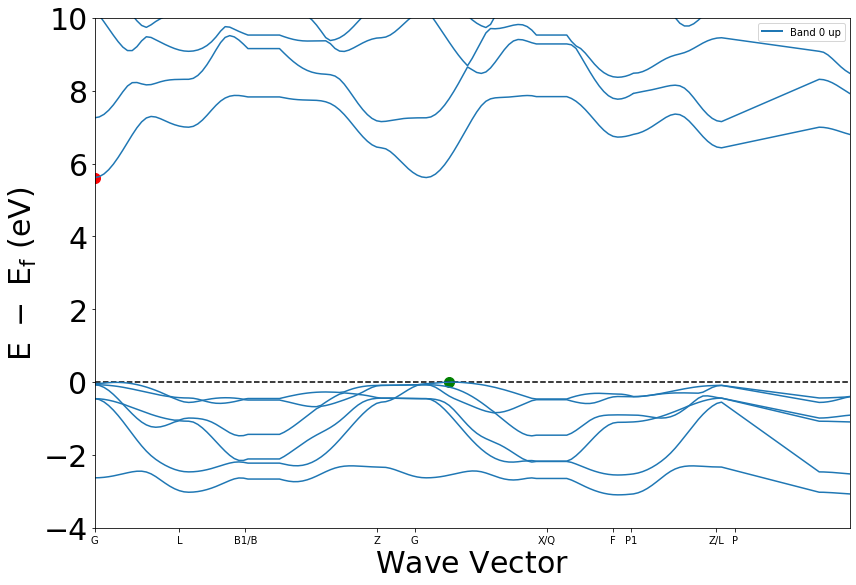

In [333]:
plt = BSPlotter(bands)
plt.get_plot(vbm_cbm_marker = True,ylim=(-4,10), zero_to_efermi=True)
ax = plot.gca()
xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")
ax.xaxis.set_ticks([0,0.9,1.6,3,3.4,4.8,5.5,5.7,6.6,6.8])
ax.xaxis.set_ticklabels(['G', 'L', 'B1/B', 'Z','G','X/Q','F','P1','Z/L','P'],fontsize = 10)

3. MASSE EFFECTIVE

Nous allons déterminer la masse effective de valance mv et de conduction mc en utilisant une dispersion parabolique

On suppose donc que : $$E = c*k^{2}$$

La masse effective étant égale à $(\frac{\partial^2 E}{\partial k^2})^{-1} = 1/2c$

Ici, j'interprète k comme la norme du vecteur k en fait, car je ne vois pas comment la relation parabolique s'applique pour des 
vecteurs à 3 dimensions

In [334]:
vbm = bands.get_vbm()
cbm = bands.get_cbm()

k2 = (np.linalg.norm(bands.kpoints[74].cart_coords))**2
c = vbm['energy']/k2
mv = 1/(2*c)
print("la masse effective de valence sous hypothèse parabolique est égale à :", np.abs(mv))



la masse effective de valence sous hypothèse parabolique est égale à : 0.03654003648364344


Pour la bande de conduction, étant donné que son min se trouve en gamma, k = 0, il faut utiliser un autre point pour déterminer le coefficent c. On va utiliser un point proche, dont on connait l'énergie. 